# Análisis de Planilla Institucional Enero 2022, Panamá

Fuente de datos: Datos Abiertos del Gobierno de Panamá.
Conjunto de datos utilizado: SMV - Planilla Institucional - Enero 2022.

**Descripción del proyecto:**
En este proyecto, realizaremos un análisis de la planilla institucional de enero de 2022 de la Comisión Nacional de Valores de Panamá.

El objetivo es obtener información clave sobre los salarios y cargos de los colaboradores, identificar tendencias, evaluar la distribución salarial y destacar posibles inequidades o brechas en la organización. Utilizaremos **Python** y diversas bibliotecas, como **Pandas**, **Matplotlib** y **Plotly**, para realizar el análisis y visualizar los resultados de manera clara y efectiva.

Pasos realizados en el proyecto:

1. Conocer los colaboradores con mayor salario dentro de la planilla y conocer el cargo que ocupan.
2. Conocer los colaboradores con menor salario dentro de la planilla y conocer el cargo que ocupan.
3. Conocer los gastos totales por cada cargo.
4. Conocer el top 10 de los cargos que más gastos están teniendo en la planilla (Visualización).
5. Conocer los 20 colaboradores que más años llevan en la organización y conocer su cargo y salario correspondiente.
6. Creación de un histograma y un gráfico de densidad para visualizar la distribución de salarios en la organización.

In [3]:
import pandas as pd

# Cargar los datos desde el archivo Excel en Google Colab
ruta_archivo = "smv-planilla-institucional-enero-2022.xlsx"
df = pd.read_excel(ruta_archivo)

# Visualizar una muestra de los datos
df.head(10)


,Posición,Nombre Funcionario,Cédula,Cargo,Salario,Gasto de Representación,Fecha de Ingreso,Estatus
0,1.0,Julio Javier Justiniani C.,8-326-200,Superintendente,6500.0,3500.0,3 de febrero de 2020,Permanente
1,2.0,Isabel Perez Henriquez,6-85-62,Secretario General,3500.0,3000.0,1 de julio de 2020,Permanente
2,4.0,Jackeline Mendieta,8-727-474,Oficial de Inspección y Analisis del Mercado,1850.0,NaN,2015-04-16 00:00:00,Permanente
3,5.0,Galina Chávez,8-705-1226,Oficial de Inspección y Analisis del Mercado,2350.0,NaN,2010-08-02 00:00:00,Permanente
4,7.0,Maruquel Murgas,8-767-456,Director Nacional de Mercado,3500.0,1500.0,27 de octubre de 2010,Permanente
5,8.0,Zaida Llerena,8-711-633,Director Asesoría Jurídca,3500.0,1500.0,4 de marzo de 2013,Permanente
6,10.0,Maidelán Murillo,8-729-698,Analista de Personal III,1200.0,NaN,2015-06-24 00:00:00,Permanente
7,11.0,Moises Moreno,8-915-1523,Archivero I,600.0,NaN,16 de mayo de 2017,Permanente
8,15.0,Celia Ana Bravo,8-705-1341,Director Nacional,3500.0,2500.0,2004-04-01 00:00:00,Permanente
9,16.0,Christina Arjona,8-404-910,Asistente Adminsitrativo I,1500.0,NaN,2000-01-03 00:00:00,Permanente


In [5]:
#Exploración y limpieza de datos

# Verificar el tipo de datos de cada columna
tipos_de_datos = df.dtypes
print(tipos_de_datos.to_string())


Posición                   float64
Nombre Funcionario          object
Cédula                      object
Cargo                       object
Salario                    float64
Gasto de Representación    float64
Fecha de Ingreso            object
Estatus                     object


In [11]:
!pip install dateparser


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 20.2 MB/s eta 0:00:00


In [12]:
#Conversión de tipos de datos

import dateparser

# Función personalizada para convertir las fechas en formato '3 de febrero de 2020' a '2020-02-03'
def convertir_fecha(fecha_str):
    if isinstance(fecha_str, str):  # Verificar si la fecha ya es una cadena
        fecha_parseada = dateparser.parse(fecha_str, languages=['es'])
        if fecha_parseada:
            return fecha_parseada.strftime('%Y-%m-%d')
    return fecha_str

# Convertir la columna 'Cédula' a tipo de dato cadena
df['Cédula'] = df['Cédula'].astype(str)

# Convertir la columna 'Fecha de Ingreso' a tipo de dato fecha
df['Fecha de Ingreso'] = df['Fecha de Ingreso'].apply(convertir_fecha)
df['Fecha de Ingreso'] = pd.to_datetime(df['Fecha de Ingreso'], errors='coerce')


In [13]:
print(df.dtypes)

Posición                          float64
Nombre Funcionario                 object
Cédula                             object
Cargo                              object
Salario                           float64
Gasto de Representación           float64
Fecha de Ingreso           datetime64[ns]
Estatus                            object
dtype: object


In [14]:
#Manejo de valores faltantes

# Verificar si hay valores faltantes en cada columna
print(df.isnull().sum())


Posición                    36
Nombre Funcionario          36
Cédula                       0
Cargo                       34
Salario                     36
Gasto de Representación    144
Fecha de Ingreso            37
Estatus                     36
dtype: int64


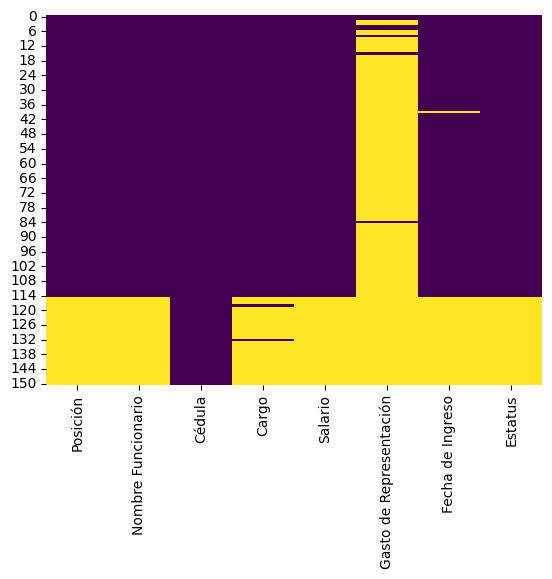

In [15]:
# Verificar visualmente los valores faltantes en el DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()


In [16]:
#Manejo de valores faltantes

# Eliminar la columna 'Gasto de Representación'
df.drop('Gasto de Representación', axis=1, inplace=True)

# Eliminar la fila con valor faltante en 'Fecha de Ingreso'
df.dropna(subset=['Fecha de Ingreso'], inplace=True)


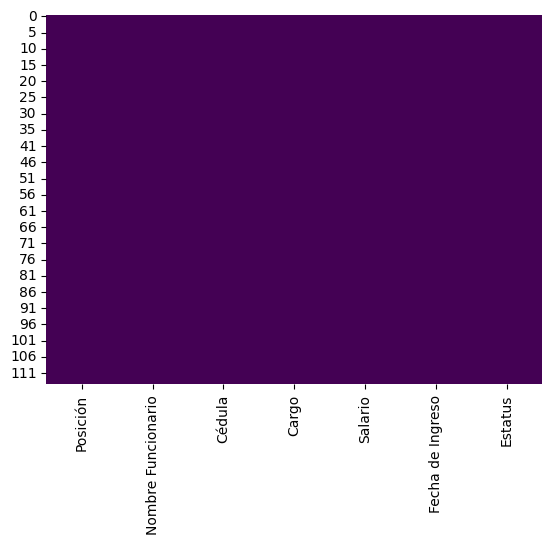

In [17]:
# Verificar visualmente los valores faltantes en el DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [19]:
#Limpieza y estandarización de datos

# Eliminar espacios en blanco adicionales en 'Nombre Funcionario'
df['Nombre Funcionario'] = df['Nombre Funcionario'].str.strip()

# Eliminar espacios en blanco adicionales en 'Cargo'
df['Cargo'] = df['Cargo'].str.strip()


In [21]:
df.head()

,Posición,Nombre Funcionario,Cédula,Cargo,Salario,Fecha de Ingreso,Estatus
0,1.0,Julio Javier Justiniani C.,8-326-200,Superintendente,6500.0,2020-02-03,Permanente
1,2.0,Isabel Perez Henriquez,6-85-62,Secretario General,3500.0,2020-07-01,Permanente
2,4.0,Jackeline Mendieta,8-727-474,Oficial de Inspección y Analisis del Mercado,1850.0,2015-04-16,Permanente
3,5.0,Galina Chávez,8-705-1226,Oficial de Inspección y Analisis del Mercado,2350.0,2010-08-02,Permanente
4,7.0,Maruquel Murgas,8-767-456,Director Nacional de Mercado,3500.0,2010-10-27,Permanente


In [26]:
#Limpieza y estandarización de datos

# Eliminar las columnas 'Posición' y 'Estatus'
#df.drop(['Posición', 'Estatus'], axis=1, inplace=True)



In [44]:
# Convertir todos los nombres de cargos a minúsculas
df['Cargo'] = df['Cargo'].str.lower()

# Eliminar espacios en blanco adicionales al inicio y al final de los nombres de cargos
df['Cargo'] = df['Cargo'].str.strip()

# Verificar los nombres de cargos después de la estandarización
print(df['Cargo'].unique())


['superintendente' 'secretario general'
 'oficial de inspección y analisis del mercado'
 'director nacional de mercado' 'director asesoría jurídca'
 'analista de personal iii' 'archivero i' 'director nacional'
 'asistente adminsitrativo i' 'jefe del departamento de contabilidad i'
 'abogado iii' 'contador ii' 'director de asistencia tecnica'
 'subdirector ejecutivo institucional' 'jefe de servicios administrativos'
 'jefe del departamento de compras ii' 'asistente administrativo i'
 'analista de sistemas y métodos informáticos i'
 'analista de presupuesto i' 'archivero ii' 'almacenista iii (supervisor)'
 'jefe de la oficina institucional de rrhh'
 'jefe de la oficina de información'
 'conductor de vehículo iv de ejecutivo' 'cotizador de precios i'
 'asistente ejecutivo i' 'coordinador de asistencia técnica internacional'
 'jefe central de presupuesto' 'almacenista i'
 'gerente de análisis y estadistica' 'analista financiero ii'
 'jefe de auditoria interna'
 'jefe de analisis y programa

In [45]:
df.head()

,Nombre Funcionario,Cédula,Cargo,Salario,Fecha de Ingreso
0,Julio Javier Justiniani C.,8-326-200,superintendente,6500.0,2020-02-03
1,Isabel Perez Henriquez,6-85-62,secretario general,3500.0,2020-07-01
2,Jackeline Mendieta,8-727-474,oficial de inspección y analisis del mercado,1850.0,2015-04-16
3,Galina Chávez,8-705-1226,oficial de inspección y analisis del mercado,2350.0,2010-08-02
4,Maruquel Murgas,8-767-456,director nacional de mercado,3500.0,2010-10-27


In [46]:
#Análisis y visualización de datos

# Organizar los datos de forma descendente según el salario
df_sorted_salario = df.sort_values('Salario', ascending=False)
df_sorted_salario.head()


,Nombre Funcionario,Cédula,Cargo,Salario,Fecha de Ingreso
0,Julio Javier Justiniani C.,8-326-200,superintendente,6500.0,2020-02-03
41,Luis Samudio,8-724-1062,subdirector ejecutivo institucional,4000.0,2013-02-18
16,Elías Dominguez,8-745-2131,subdirector ejecutivo institucional,3500.0,2012-04-02
89,Rafael García,8-461-22,subdirector ejecutivo institucional,3500.0,2006-04-10
4,Maruquel Murgas,8-767-456,director nacional de mercado,3500.0,2010-10-27


In [60]:
#Análisis y visualización de datos

# Organizar los datos de forma ascendente según el salario
df_sorted_salario = df.sort_values('Salario', ascending=True)
df_sorted_salario.head(10)

,Nombre Funcionario,Cédula,Cargo,Salario,Fecha de Ingreso
56,Juan Carlos Garcia,8-723-342,almacenista i,600.0,2017-08-01
103,Ariel Avila,8-921-2145,ayudante general,600.0,2018-01-02
7,Moises Moreno,8-915-1523,archivero i,600.0,2017-05-16
112,Marixenia Montoya,8-888-1628,asistente de información y relaciones públicas,700.0,2018-03-16
76,Randolfo Barria,2-708-1883,conductor de vehículo i,700.0,2015-08-20
66,Nazly Cordoba,8-889-1070,archivero i,700.0,2017-05-16
28,Nicol Macías,8-921-567,archivero ii,700.0,2015-06-22
48,Ricaurte Castillo,8-903-1588,cotizador de precios i,700.0,2014-06-02
42,Yodalina Salas,8-398-636,asistente administrativo i,750.0,2010-03-01
96,James Mclean,8-247-874,agente de seguridad i,750.0,2017-05-03


In [47]:
# Crear un DataFrame con los totales de salarios por tipo de cargo
df_totals_por_cargo = df.groupby('Cargo')['Salario'].sum().reset_index()

# Crear un DataFrame auxiliar con la columna "Cargo" y la columna "Cantidad de Personas"
df_cantidad_personas = df.groupby('Cargo').size().reset_index(name='Cantidad de Personas')

# Combinar los DataFrames utilizando el método merge()
df_totals_por_cargo = df_totals_por_cargo.merge(df_cantidad_personas, on='Cargo')

# Ordenar el DataFrame por el total de salarios de forma descendente
df_totals_por_cargo = df_totals_por_cargo.sort_values('Salario', ascending=False)

# Mostrar los primeros 10 resultados
df_totals_por_cargo.head(10)



,Cargo,Salario,Cantidad de Personas
44,oficial de inspección y analisis del mercado,101975.0,51
48,subdirector ejecutivo institucional,11000.0,3
0,abogado iii,10900.0,5
13,asistente administrativo i,8150.0,6
49,superintendente,6500.0,1
27,director asesoría jurídca,3500.0,1
28,director de asistencia tecnica,3500.0,1
46,secretario general,3500.0,1
12,asesor ii,3500.0,1
32,gerente de análisis y estadistica,3500.0,1


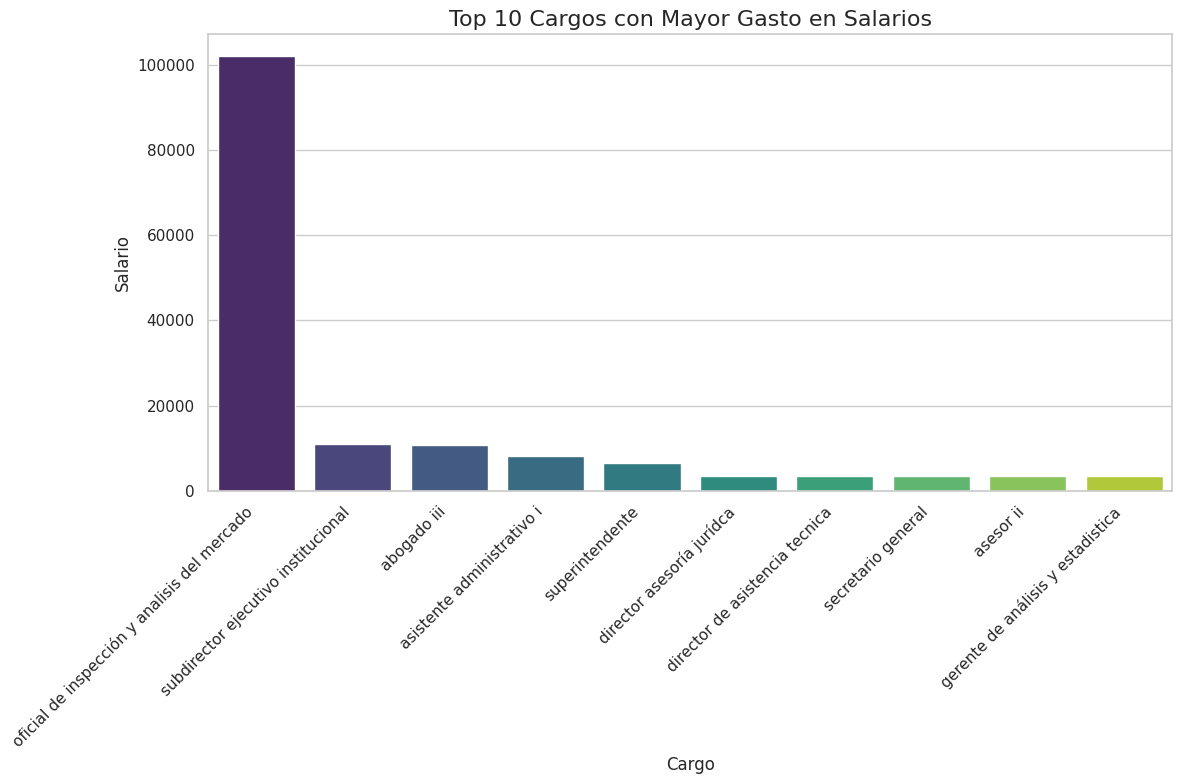

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual con Seaborn
sns.set(style="whitegrid")

# Obtener los 10 cargos que más gastos generan
top_10_cargos = df_totals_por_cargo.head(10)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
bar_plot = sns.barplot(data=top_10_cargos, x='Cargo', y='Salario', palette='viridis', ax=ax)

# Configurar los detalles del gráfico
bar_plot.set_title('Top 10 Cargos con Mayor Gasto en Salarios', fontsize=16)
bar_plot.set_xlabel('Cargo', fontsize=12)
bar_plot.set_ylabel('Salario', fontsize=12)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')
# Ajustar el espaciado entre las barras y los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()




In [65]:
#Analizar los 20 colaboradores que mas años llevan en la organizacion.

import pandas as pd
import datetime as dt

# Convertir la fecha actual en un objeto DatetimeArray
fecha_actual = pd.to_datetime(dt.datetime.now().date())

# Calcular el número de años de antigüedad para cada persona
df['Antiguedad'] = (fecha_actual - df['Fecha de Ingreso']).dt.days // 365

# Ordenar el DataFrame por antigüedad de forma descendente
df_mas_antiguos = df.sort_values('Antiguedad', ascending=False).head(20)

# Crear un nuevo DataFrame con las columnas deseadas
df_resultados = df_mas_antiguos[['Nombre Funcionario', 'Cargo', 'Salario', 'Antiguedad']].copy()

# Mostrar el nuevo DataFrame con las 20 personas más antiguas, su cargo, salario y antigüedad en años
df_resultados.head(20)




,Nombre Funcionario,Cargo,Salario,Antiguedad
14,Tania de Yanis,contador ii,2000.0,23
85,Mariela Villa,asistente ejecutivo ii,1750.0,23
9,Christina Arjona,asistente adminsitrativo i,1500.0,23
8,Celia Ana Bravo,director nacional,3500.0,19
31,Gisela González,oficial de inspección y analisis del mercado,2600.0,17
22,Jacqueline Castro,jefe del departamento de compras ii,2300.0,17
89,Rafael García,subdirector ejecutivo institucional,3500.0,17
19,Jackeline Lay,oficial de inspección y analisis del mercado,2600.0,17
36,Xochyl Suira,oficial de inspección y analisis del mercado,2500.0,16
26,Brenda Bethancourth,analista de sistemas y métodos informáticos i,1450.0,15


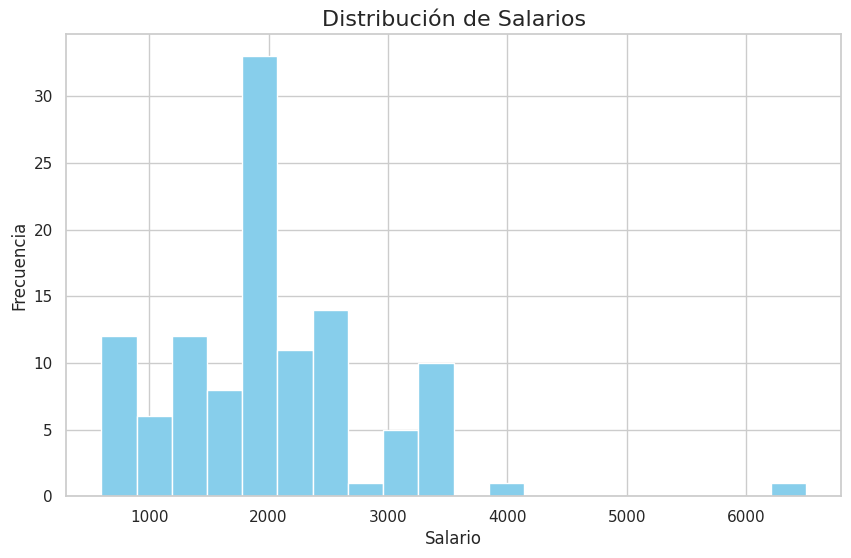

In [66]:
#Visualizaciones
import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Salario'], bins=20, color='skyblue')

# Configurar los detalles del gráfico
plt.title('Distribución de Salarios', fontsize=16)
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el histograma
plt.show()


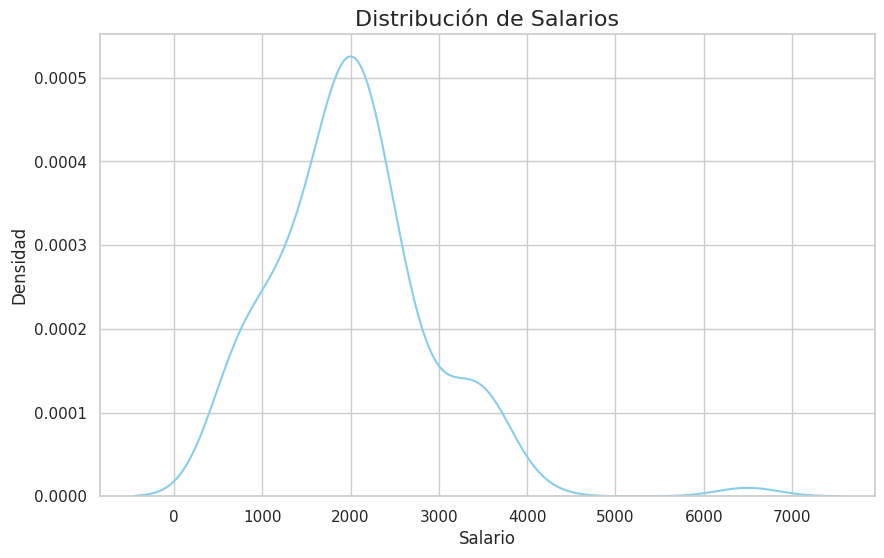

In [67]:
import seaborn as sns

# Configurar el estilo visual con Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Salario'], color='skyblue')

# Configurar los detalles del gráfico
plt.title('Distribución de Salarios', fontsize=16)
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Mostrar el gráfico de densidad
plt.show()


# Importancia del análisis realizado:

Los análisis realizados en este proyecto proporcionan información valiosa para comprender y evaluar diferentes aspectos de la planilla institucional. Estos hallazgos pueden respaldar la toma de decisiones relacionadas con la gestión de personal, la planificación financiera y la implementación de políticas salariales justas y competitivas. A continuación, se resumen las principales conclusiones de cada análisis:

* Conocer los colaboradores con mayor salario y su cargo permite evaluar la estructura salarial y la competitividad de la empresa en términos de compensación.

* Identificar los colaboradores con menor salario y su cargo ayuda a detectar posibles inequidades salariales y tomar medidas para abordarlas.

* Conocer los gastos totales por cada cargo brinda información sobre el impacto financiero de cada rol y permite evaluar la eficiencia en la asignación de recursos.

* El gráfico de los 10 cargos con mayores gastos ayuda en la toma de decisiones relacionadas con la gestión de recursos y la planificación financiera.

* Identificar los colaboradores con mayor antigüedad y su cargo proporciona información sobre la estructura de antigüedad y puede ser útil para reconocer y retener a los empleados más destacados.

* El histograma y el gráfico de densidad revelan la distribución de salarios, identificando tendencias y posibles valores atípicos.